In [1]:
import pandas as pd
import numpy as np
import librosa
import matplotlib
import matplotlib.pyplot as plt
import librosa.display
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

In [2]:
df=pd.read_csv('Meta_Data_of_audio_files.csv')
df=df.drop(0)
display(df)
df_feat=df
file=df_feat['File_Path']
classid=df_feat['Class_ID']
df_feat

,Unnamed: 0,File_Path,Class_ID,Class
1,1,Audio files/Copd/104_1b1_Ar_sc_Litt3200.wav,4,Copd
2,2,Audio files/Copd/104_1b1_Ll_sc_Litt3200.wav,4,Copd
3,3,Audio files/Copd/104_1b1_Lr_sc_Litt3200.wav,4,Copd
4,4,Audio files/Copd/104_1b1_Pl_sc_Litt3200.wav,4,Copd
5,5,Audio files/Copd/104_1b1_Pr_sc_Litt3200.wav,4,Copd
...,...,...,...,...
883,883,Audio files/URTI/190_1b1_Tc_sc_Meditron.wav,8,URTI
884,884,Audio files/URTI/197_1b1_Al_sc_Meditron.wav,8,URTI
885,885,Audio files/URTI/197_1b1_Tc_sc_Meditron.wav,8,URTI
886,886,Audio files/URTI/210_1b1_Al_sc_Meditron.wav,8,URTI


,Unnamed: 0,File_Path,Class_ID,Class
1,1,Audio files/Copd/104_1b1_Ar_sc_Litt3200.wav,4,Copd
2,2,Audio files/Copd/104_1b1_Ll_sc_Litt3200.wav,4,Copd
3,3,Audio files/Copd/104_1b1_Lr_sc_Litt3200.wav,4,Copd
4,4,Audio files/Copd/104_1b1_Pl_sc_Litt3200.wav,4,Copd
5,5,Audio files/Copd/104_1b1_Pr_sc_Litt3200.wav,4,Copd
...,...,...,...,...
883,883,Audio files/URTI/190_1b1_Tc_sc_Meditron.wav,8,URTI
884,884,Audio files/URTI/197_1b1_Al_sc_Meditron.wav,8,URTI
885,885,Audio files/URTI/197_1b1_Tc_sc_Meditron.wav,8,URTI
886,886,Audio files/URTI/210_1b1_Al_sc_Meditron.wav,8,URTI


In [ ]:
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)

In [9]:
#for padding data
def padding(array, xx, yy):
    """
    :param array: numpy array
    :param xx: desired height
    :param yy: desired width
    :return: padded array
    """
    h = array.shape[0]
    w = array.shape[1]
    a = max((xx - h) // 2,0)
    aa = max(0,xx - a - h)
    b = max(0,(yy - w) // 2)
    bb = max(yy - b - w,0)
    return np.pad(array, pad_width=((a, aa), (b, bb)), mode='constant')

In [62]:
def get_features(df_in):   
    features=[]     
    labels = [] #empty array to store labels   
    sample_rate=28000
    #For each species, determine how many augmentations are needed
    df_in=df_in.reset_index()     
    for i in df_in.Class_ID.unique():
           print('Class_ID:',i)    
           #all the file indices with the same species_id     
           filelist = df_in.loc[df_in.Class_ID == i].index 
           #filelist = df_in.loc[df_in.Class_ID == 3].index
           for j in range(0,len(filelist)):             
                        filename = df_in.iloc[filelist[j]].File_Path #get the filename   
                        Class_ID = i
                        print(filename + ' '+ 'going on')
                        print(str(j+1)+' out of '+ str(len(filelist))+'\n')
                        samples, sample_rate= librosa.load(filename, sr=2800)
                        #plt.figure(figsize=(14, 5))
                        #librosa.display.waveshow(samples, sr=sample_rate)
                        y=samples
                        fig = plt.Figure()
                        canvas = FigureCanvas(fig)
                        ax = fig.add_subplot(111)
                        sgram = np.abs(librosa.stft(samples))
                        sgram_mag, _ = librosa.magphase(sgram)
                        mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
                        mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
                        p=librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
                        print('Mel-Spectrogram/'+filename.split('/')[1]+'/'+filename.split('/')[2]+'.png')
                        plt.savefig('Mel-Spectrogram/'+filename.split('/')[1]+'/'+filename.split('/')[2]+'.png')

    output=np.concatenate(features,axis=0)     
    return(np.array(output), labels)

Class_ID: 4
Audio files/Copd/104_1b1_Ar_sc_Litt3200.wav going on
1 out of 792

Mel-Spectrogram/Copd/104_1b1_Ar_sc_Litt3200.wav.png
Audio files/Copd/104_1b1_Ll_sc_Litt3200.wav going on
2 out of 792

Mel-Spectrogram/Copd/104_1b1_Ll_sc_Litt3200.wav.png
Audio files/Copd/104_1b1_Lr_sc_Litt3200.wav going on
3 out of 792

Mel-Spectrogram/Copd/104_1b1_Lr_sc_Litt3200.wav.png
Audio files/Copd/104_1b1_Pl_sc_Litt3200.wav going on
4 out of 792

Mel-Spectrogram/Copd/104_1b1_Pl_sc_Litt3200.wav.png
Audio files/Copd/104_1b1_Pr_sc_Litt3200.wav going on
5 out of 792

Mel-Spectrogram/Copd/104_1b1_Pr_sc_Litt3200.wav.png
Audio files/Copd/106_2b1_Pl_mc_LittC2SE.wav going on
6 out of 792

Mel-Spectrogram/Copd/106_2b1_Pl_mc_LittC2SE.wav.png
Audio files/Copd/106_2b1_Pr_mc_LittC2SE.wav going on
7 out of 792

Mel-Spectrogram/Copd/106_2b1_Pr_mc_LittC2SE.wav.png
Audio files/Copd/107_2b3_Al_mc_AKGC417L.wav going on
8 out of 792

Mel-Spectrogram/Copd/107_2b3_Al_mc_AKGC417L.wav.png
Audio files/Copd/107_2b3_Ar_mc_AKGC4

Mel-Spectrogram/Copd/118_1b1_Pl_sc_Litt3200.wav.png
Audio files/Copd/118_1b1_Pr_sc_Litt3200.wav going on
70 out of 792

Mel-Spectrogram/Copd/118_1b1_Pr_sc_Litt3200.wav.png
Audio files/Copd/120_1b1_Al_sc_Meditron.wav going on
71 out of 792

Mel-Spectrogram/Copd/120_1b1_Al_sc_Meditron.wav.png
Audio files/Copd/120_1b1_Ar_sc_Meditron.wav going on
72 out of 792

Mel-Spectrogram/Copd/120_1b1_Ar_sc_Meditron.wav.png
Audio files/Copd/120_1b1_Lr_sc_Meditron.wav going on
73 out of 792

Mel-Spectrogram/Copd/120_1b1_Lr_sc_Meditron.wav.png
Audio files/Copd/120_1b1_Pl_sc_Meditron.wav going on
74 out of 792

Mel-Spectrogram/Copd/120_1b1_Pl_sc_Meditron.wav.png
Audio files/Copd/120_1b1_Pr_sc_Meditron.wav going on
75 out of 792

Mel-Spectrogram/Copd/120_1b1_Pr_sc_Meditron.wav.png
Audio files/Copd/124_1b1_Al_sc_Litt3200.wav going on
76 out of 792

Mel-Spectrogram/Copd/124_1b1_Al_sc_Litt3200.wav.png
Audio files/Copd/124_1b1_Ar_sc_Litt3200.wav going on
77 out of 792

Mel-Spectrogram/Copd/124_1b1_Ar_sc_Litt3

Mel-Spectrogram/Copd/130_3p2_Ar_mc_AKGC417L.wav.png
Audio files/Copd/130_3p2_Pl_mc_AKGC417L.wav going on
138 out of 792

Mel-Spectrogram/Copd/130_3p2_Pl_mc_AKGC417L.wav.png
Audio files/Copd/130_3p2_Pr_mc_AKGC417L.wav going on
139 out of 792

Mel-Spectrogram/Copd/130_3p2_Pr_mc_AKGC417L.wav.png
Audio files/Copd/130_3p2_Tc_mc_AKGC417L.wav going on
140 out of 792

Mel-Spectrogram/Copd/130_3p2_Tc_mc_AKGC417L.wav.png
Audio files/Copd/130_3p3_Al_mc_AKGC417L.wav going on
141 out of 792

Mel-Spectrogram/Copd/130_3p3_Al_mc_AKGC417L.wav.png
Audio files/Copd/130_3p3_Pl_mc_AKGC417L.wav going on
142 out of 792

Mel-Spectrogram/Copd/130_3p3_Pl_mc_AKGC417L.wav.png
Audio files/Copd/130_3p3_Pr_mc_AKGC417L.wav going on
143 out of 792

Mel-Spectrogram/Copd/130_3p3_Pr_mc_AKGC417L.wav.png
Audio files/Copd/130_3p3_Tc_mc_AKGC417L.wav going on
144 out of 792

Mel-Spectrogram/Copd/130_3p3_Tc_mc_AKGC417L.wav.png
Audio files/Copd/130_3p4_Al_mc_AKGC417L.wav going on
145 out of 792

Mel-Spectrogram/Copd/130_3p4_Al_

In [17]:
def get_features(df_in):   
    features=[]     
    labels = [] #empty array to store labels   
    sample_rate=28000
    #For each species, determine how many augmentations are needed
    df_in=df_in.reset_index()     
    for i in [6, 7, 8]:#df_in.Class_ID.unique()]:
           print('Class_ID:',i)    
           #all the file indices with the same species_id     
           filelist = df_in.loc[df_in.Class_ID == i].index 
           #filelist = df_in.loc[df_in.Class_ID == 3].index
           for j in range(0,len(filelist)):             
                        filename = df_in.iloc[filelist[j]].File_Path #get the filename   
                        Class_ID = i
                        print(filename + ' '+ 'going on')
                        print(str(j+1)+' out of '+ str(len(filelist))+'\n')
                        samples, sample_rate= librosa.load(filename, sr=2800)
                        #plt.figure(figsize=(14, 5))
                        #librosa.display.waveshow(samples, sr=sample_rate)
                        y=samples
#                         fig = plt.Figure()
#                         canvas = FigureCanvas(fig)
#                         ax = fig.add_subplot(111)
                        sgram = np.abs(librosa.stft(samples))
                        sgram_mag, _ = librosa.magphase(sgram)
                        mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
                        mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
                        mel_sgram_p=padding(mel_sgram, 128, 500)
                        data=mel_sgram_p
                        print(data.shape)
                        #p=librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
                        #print('Mel-Spectrogram/'+filename.split('/')[1]+'/'+filename.split('/')[2]+'.png')
                        #plt.savefig('Mel-Spectrogram/'+filename.split('/')[1]+'/'+filename.split('/')[2]+'.png')
                        features.append(data[np.newaxis,...])    
                        labels.append(Class_ID)
    output=np.concatenate(features,axis=0)     
    return(np.array(output), labels)

In [18]:
X_mel, y_mel=get_features(df_feat)

Class_ID: 6
Audio files/Healthy/102_1b1_Ar_sc_Meditron.wav going on
1 out of 35

(128, 500)
Audio files/Healthy/121_1b1_Tc_sc_Meditron.wav going on
2 out of 35

(128, 500)
Audio files/Healthy/121_1p1_Tc_sc_Meditron.wav going on
3 out of 35

(128, 500)
Audio files/Healthy/123_1b1_Al_sc_Meditron.wav going on
4 out of 35

(128, 500)
Audio files/Healthy/125_1b1_Tc_sc_Meditron.wav going on
5 out of 35

(128, 500)
Audio files/Healthy/126_1b1_Al_sc_Meditron.wav going on
6 out of 35

(128, 500)
Audio files/Healthy/127_1b1_Ar_sc_Meditron.wav going on
7 out of 35

(128, 500)
Audio files/Healthy/136_1b1_Ar_sc_Meditron.wav going on
8 out of 35

(128, 500)
Audio files/Healthy/143_1b1_Al_sc_Meditron.wav going on
9 out of 35

(128, 500)
Audio files/Healthy/144_1b1_Al_sc_Meditron.wav going on
10 out of 35

(128, 500)
Audio files/Healthy/144_1b1_Tc_sc_Meditron.wav going on
11 out of 35

(128, 500)
Audio files/Healthy/152_1b1_Al_sc_Meditron.wav going on
12 out of 35

(128, 500)
Audio files/Healthy/153_1

In [16]:
X_mel.shape

(35, 128, 500)

In [6]:
X_mel, y_mel=get_features(df_feat)

Class_ID: 4
Audio files/Copd/104_1b1_Ar_sc_Litt3200.wav going on
1 out of 792

Audio files/Copd/104_1b1_Ll_sc_Litt3200.wav going on
2 out of 792

Audio files/Copd/104_1b1_Lr_sc_Litt3200.wav going on
3 out of 792

Audio files/Copd/104_1b1_Pl_sc_Litt3200.wav going on
4 out of 792

Audio files/Copd/104_1b1_Pr_sc_Litt3200.wav going on
5 out of 792

Audio files/Copd/106_2b1_Pl_mc_LittC2SE.wav going on
6 out of 792

Audio files/Copd/106_2b1_Pr_mc_LittC2SE.wav going on
7 out of 792

Audio files/Copd/107_2b3_Al_mc_AKGC417L.wav going on
8 out of 792

Audio files/Copd/107_2b3_Ar_mc_AKGC417L.wav going on
9 out of 792

Audio files/Copd/107_2b3_Ll_mc_AKGC417L.wav going on
10 out of 792

Audio files/Copd/107_2b3_Lr_mc_AKGC417L.wav going on
11 out of 792

Audio files/Copd/107_2b3_Pl_mc_AKGC417L.wav going on
12 out of 792

Audio files/Copd/107_2b3_Pr_mc_AKGC417L.wav going on
13 out of 792

Audio files/Copd/107_2b3_Tc_mc_AKGC417L.wav going on
14 out of 792

Audio files/Copd/107_2b4_Al_mc_AKGC417L.wav g

Audio files/Copd/130_2b4_Pl_mc_AKGC417L.wav going on
122 out of 792

Audio files/Copd/130_2p3_Pl_mc_AKGC417L.wav going on
123 out of 792

Audio files/Copd/130_2p5_Al_mc_AKGC417L.wav going on
124 out of 792

Audio files/Copd/130_2p5_Ar_mc_AKGC417L.wav going on
125 out of 792

Audio files/Copd/130_2p5_Lr_mc_AKGC417L.wav going on
126 out of 792

Audio files/Copd/130_2p5_Pl_mc_AKGC417L.wav going on
127 out of 792

Audio files/Copd/130_2p5_Pr_mc_AKGC417L.wav going on
128 out of 792

Audio files/Copd/130_2p5_Tc_mc_AKGC417L.wav going on
129 out of 792

Audio files/Copd/130_3b3_Ll_mc_AKGC417L.wav going on
130 out of 792

Audio files/Copd/130_3b4_Al_mc_AKGC417L.wav going on
131 out of 792

Audio files/Copd/130_3b4_Ar_mc_AKGC417L.wav going on
132 out of 792

Audio files/Copd/130_3b4_Lr_mc_AKGC417L.wav going on
133 out of 792

Audio files/Copd/130_3b4_Pl_mc_AKGC417L.wav going on
134 out of 792

Audio files/Copd/130_3b4_Pr_mc_AKGC417L.wav going on
135 out of 792

Audio files/Copd/130_3p2_Al_mc_AKG

Audio files/Copd/147_2b3_Al_mc_AKGC417L.wav going on
241 out of 792

Audio files/Copd/147_2b3_Ar_mc_AKGC417L.wav going on
242 out of 792

Audio files/Copd/147_2b3_Ll_mc_AKGC417L.wav going on
243 out of 792

Audio files/Copd/147_2b3_Lr_mc_AKGC417L.wav going on
244 out of 792

Audio files/Copd/147_2b3_Pl_mc_AKGC417L.wav going on
245 out of 792

Audio files/Copd/147_2b4_Al_mc_AKGC417L.wav going on
246 out of 792

Audio files/Copd/147_2b4_Ar_mc_AKGC417L.wav going on
247 out of 792

Audio files/Copd/147_2b4_Ll_mc_AKGC417L.wav going on
248 out of 792

Audio files/Copd/147_2b4_Lr_mc_AKGC417L.wav going on
249 out of 792

Audio files/Copd/147_2b4_Pl_mc_AKGC417L.wav going on
250 out of 792

Audio files/Copd/151_2p2_Al_mc_AKGC417L.wav going on
251 out of 792

Audio files/Copd/151_2p2_Ar_mc_AKGC417L.wav going on
252 out of 792

Audio files/Copd/151_2p2_Ll_mc_AKGC417L.wav going on
253 out of 792

Audio files/Copd/151_2p2_Lr_mc_AKGC417L.wav going on
254 out of 792

Audio files/Copd/151_2p2_Pl_mc_AKG

Audio files/Copd/160_1b3_Tc_mc_AKGC417L.wav going on
360 out of 792

Audio files/Copd/160_1b4_Al_mc_AKGC417L.wav going on
361 out of 792

Audio files/Copd/160_1b4_Ar_mc_AKGC417L.wav going on
362 out of 792

Audio files/Copd/160_1b4_Lr_mc_AKGC417L.wav going on
363 out of 792

Audio files/Copd/160_1b4_Pl_mc_AKGC417L.wav going on
364 out of 792

Audio files/Copd/160_1b4_Pr_mc_AKGC417L.wav going on
365 out of 792

Audio files/Copd/160_1b4_Tc_mc_AKGC417L.wav going on
366 out of 792

Audio files/Copd/160_2b3_Lr_mc_AKGC417L.wav going on
367 out of 792

Audio files/Copd/160_2b4_Ar_mc_AKGC417L.wav going on
368 out of 792

Audio files/Copd/160_2b4_Pl_mc_AKGC417L.wav going on
369 out of 792

Audio files/Copd/160_2b4_Pr_mc_AKGC417L.wav going on
370 out of 792

Audio files/Copd/160_2b4_Tc_mc_AKGC417L.wav going on
371 out of 792

Audio files/Copd/162_1b2_Al_mc_AKGC417L.wav going on
372 out of 792

Audio files/Copd/162_1b2_Ar_mc_AKGC417L.wav going on
373 out of 792

Audio files/Copd/162_1b2_Ll_mc_AKG

Audio files/Copd/174_1p4_Ll_mc_AKGC417L.wav going on
479 out of 792

Audio files/Copd/174_1p4_Lr_mc_AKGC417L.wav going on
480 out of 792

Audio files/Copd/174_1p4_Pl_mc_AKGC417L.wav going on
481 out of 792

Audio files/Copd/174_1p4_Pr_mc_AKGC417L.wav going on
482 out of 792

Audio files/Copd/174_1p4_Tc_mc_AKGC417L.wav going on
483 out of 792

Audio files/Copd/174_2p3_Al_mc_AKGC417L.wav going on
484 out of 792

Audio files/Copd/174_2p3_Ar_mc_AKGC417L.wav going on
485 out of 792

Audio files/Copd/174_2p3_Pl_mc_AKGC417L.wav going on
486 out of 792

Audio files/Copd/174_2p3_Pr_mc_AKGC417L.wav going on
487 out of 792

Audio files/Copd/174_2p3_Tc_mc_AKGC417L.wav going on
488 out of 792

Audio files/Copd/175_1b1_Al_sc_Litt3200.wav going on
489 out of 792

Audio files/Copd/175_1b1_Ar_sc_Litt3200.wav going on
490 out of 792

Audio files/Copd/175_1b1_Ll_sc_Litt3200.wav going on
491 out of 792

Audio files/Copd/175_1b1_Lr_sc_Litt3200.wav going on
492 out of 792

Audio files/Copd/175_1b1_Pl_sc_Lit

Audio files/Copd/192_2b1_Ar_mc_LittC2SE.wav going on
598 out of 792

Audio files/Copd/192_2b2_Al_mc_LittC2SE.wav going on
599 out of 792

Audio files/Copd/192_2b2_Ar_mc_LittC2SE.wav going on
600 out of 792

Audio files/Copd/192_2b3_Al_mc_LittC2SE.wav going on
601 out of 792

Audio files/Copd/192_2b3_Ar_mc_LittC2SE.wav going on
602 out of 792

Audio files/Copd/193_1b2_Al_mc_AKGC417L.wav going on
603 out of 792

Audio files/Copd/193_1b2_Ar_mc_AKGC417L.wav going on
604 out of 792

Audio files/Copd/193_1b2_Ll_mc_AKGC417L.wav going on
605 out of 792

Audio files/Copd/193_1b2_Pl_mc_AKGC417L.wav going on
606 out of 792

Audio files/Copd/193_1b2_Pr_mc_AKGC417L.wav going on
607 out of 792

Audio files/Copd/193_1b2_Tc_mc_AKGC417L.wav going on
608 out of 792

Audio files/Copd/193_1b4_Lr_mc_AKGC417L.wav going on
609 out of 792

Audio files/Copd/193_7b3_Al_mc_AKGC417L.wav going on
610 out of 792

Audio files/Copd/193_7b3_Ar_mc_AKGC417L.wav going on
611 out of 792

Audio files/Copd/193_7b3_Ll_mc_AKG

Audio files/Copd/207_2b3_Al_mc_AKGC417L.wav going on
717 out of 792

Audio files/Copd/207_2b3_Ar_mc_AKGC417L.wav going on
718 out of 792

Audio files/Copd/207_2b3_Pl_mc_AKGC417L.wav going on
719 out of 792

Audio files/Copd/207_2b3_Pr_mc_AKGC417L.wav going on
720 out of 792

Audio files/Copd/207_2b3_Tc_mc_AKGC417L.wav going on
721 out of 792

Audio files/Copd/207_2b4_Al_mc_AKGC417L.wav going on
722 out of 792

Audio files/Copd/207_2b4_Ar_mc_AKGC417L.wav going on
723 out of 792

Audio files/Copd/207_2b4_Pl_mc_AKGC417L.wav going on
724 out of 792

Audio files/Copd/207_2b4_Pr_mc_AKGC417L.wav going on
725 out of 792

Audio files/Copd/207_2b4_Tc_mc_AKGC417L.wav going on
726 out of 792

Audio files/Copd/207_3b2_Al_mc_AKGC417L.wav going on
727 out of 792

Audio files/Copd/207_3b2_Ar_mc_AKGC417L.wav going on
728 out of 792

Audio files/Copd/207_3b2_Lr_mc_AKGC417L.wav going on
729 out of 792

Audio files/Copd/207_3b2_Pl_mc_AKGC417L.wav going on
730 out of 792

Audio files/Copd/207_3b2_Pr_mc_AKG

Audio files/Pneumonia/122_2b3_Ar_mc_LittC2SE.wav going on
8 out of 37

Audio files/Pneumonia/122_2b3_Tc_mc_LittC2SE.wav going on
9 out of 37

Audio files/Pneumonia/135_2b1_Al_mc_LittC2SE.wav going on
10 out of 37

Audio files/Pneumonia/135_2b1_Ar_mc_LittC2SE.wav going on
11 out of 37

Audio files/Pneumonia/135_2b1_Pl_mc_LittC2SE.wav going on
12 out of 37

Audio files/Pneumonia/135_2b1_Tc_mc_LittC2SE.wav going on
13 out of 37

Audio files/Pneumonia/135_2b2_Al_mc_LittC2SE.wav going on
14 out of 37

Audio files/Pneumonia/135_2b2_Ar_mc_LittC2SE.wav going on
15 out of 37

Audio files/Pneumonia/135_2b2_Pl_mc_LittC2SE.wav going on
16 out of 37

Audio files/Pneumonia/135_2b2_Tc_mc_LittC2SE.wav going on
17 out of 37

Audio files/Pneumonia/135_2b3_Al_mc_LittC2SE.wav going on
18 out of 37

Audio files/Pneumonia/135_2b3_Ar_mc_LittC2SE.wav going on
19 out of 37

Audio files/Pneumonia/135_2b3_Pl_mc_LittC2SE.wav going on
20 out of 37

Audio files/Pneumonia/135_2b3_Pr_mc_LittC2SE.wav going on
21 out o

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 140 and the array at index 1 has size 102

In [20]:
np.save('X-mel-3cat',X_mel)
np.save('y-mel-3cat',y_mel)

(128, 110)
Mel-Spectrogram/Healthy/102_1b1_Ar_sc_Meditron.wav.png


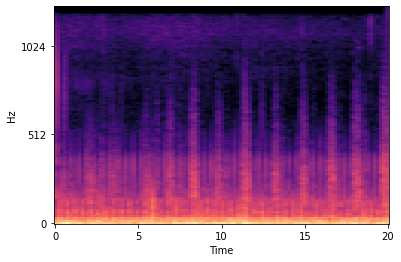

In [57]:
filename='Audio files/Healthy/102_1b1_Ar_sc_Meditron.wav'
samples, sample_rate= librosa.load(filename, sr=2800)
#plt.figure(figsize=(14, 5))
#librosa.display.waveshow(samples, sr=sample_rate)
y=samples
fig = plt.Figure()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
sgram = np.abs(librosa.stft(samples))
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
p=librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
print(mel_sgram.shape)
print('Mel-Spectrogram/'+filename.split('/')[1]+'/'+filename.split('/')[2]+'.png')
plt.savefig('Mel-Spectrogram/'+filename.split('/')[1]+'/'+filename.split('/')[2]+'.png')

window_size = 1024
window = np.hanning(window_size)
stft  = librosa.core.spectrum.stft(y, n_fft=window_size, hop_length=512, window=window)
out = 2 * np.abs(stft) / np.sum(window)

fig = plt.Figure()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
p = librosa.display.specshow(librosa.amplitude_to_db(out, ref=np.max), ax=ax, y_axis='log', x_axis='time')
plt.savefig('Mel-Spectrogram/'+filename.split('/')[1]+'/'+filename.split('/')[2]+'-stft.png')
p

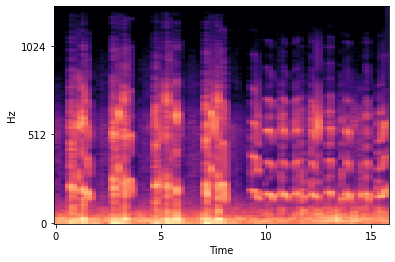

In [33]:

filename='Audio files/Copd/104_1b1_Al_sc_Litt3200.wav'
samples, sample_rate= librosa.load(filename, sr=2800)
#plt.figure(figsize=(14, 5))
#librosa.display.waveshow(samples, sr=sample_rate)
sgram = np.abs(librosa.stft(samples))
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
fig = plt.Figure()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')

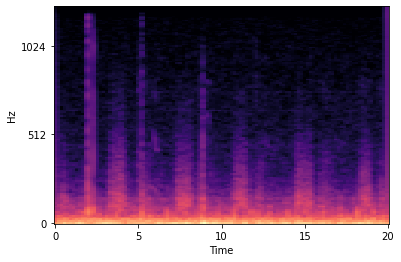

In [34]:
filename='Audio files/Pneumonia/122_2b1_Al_mc_LittC2SE.wav'
samples, sample_rate= librosa.load(filename, sr=2800)
#plt.figure(figsize=(14, 5))
#librosa.display.waveshow(samples, sr=sample_rate)
sgram = np.abs(librosa.stft(samples))
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
fig = plt.Figure()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')

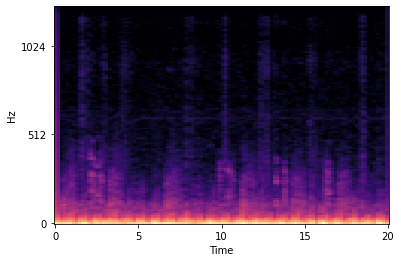

In [35]:
filename='Audio files/Asthma/103_2b2_Ar_mc_LittC2SE.wav'
samples, sample_rate= librosa.load(filename, sr=2800)
#plt.figure(figsize=(14, 5))
#librosa.display.waveshow(samples, sr=sample_rate)
sgram = np.abs(librosa.stft(samples))
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
fig = plt.Figure()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')